<a href="https://colab.research.google.com/github/eggtgg/bt_minhtriho_all/blob/main/k2_n3/thuat_toan/10_3_23/hoi_quy_10_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd

In [112]:
data_raw = pd.read_csv("USA_Housing.csv")

In [113]:
y = data_raw["Price"].to_numpy()

In [114]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [115]:
del data_raw['Address']

In [116]:
del data_raw["Price"]

In [117]:
data_raw

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [118]:
X = data_raw.to_numpy()

In [119]:
X.shape

(5000, 5)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [121]:
X_scaled = scaler.fit_transform(X)

In [122]:
X_scaled

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

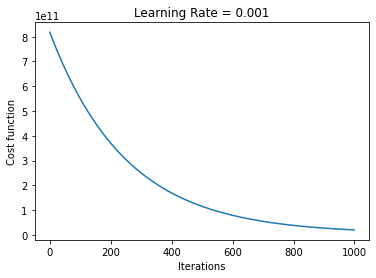

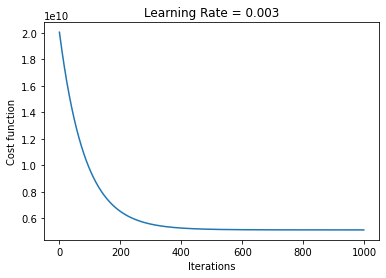

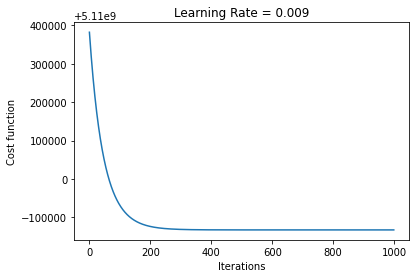

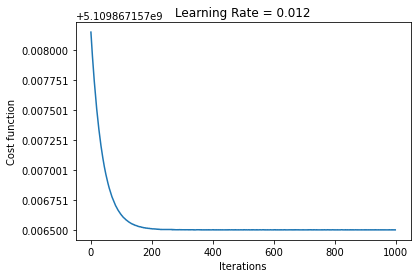

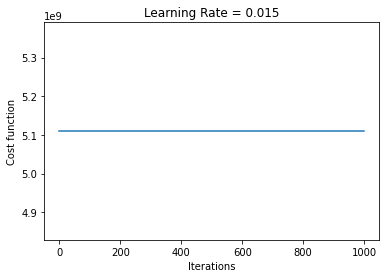

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu ngẫu nhiên cho bài toán hồi quy tuyến tính đơn giản với ba tham số
# Thêm một cột giá trị 1 vào X để tính b0
X_b = np.c_[np.ones((5000, 1)), X_scaled]

# Khởi tạo các tham số mô hình và learning rate
theta = np.random.randn(6,1)
learning_rates = [0.001, 0.003, 0.009, 0.012, 0.015]

# Số lần lặp lại và giá trị hàm mất mát ban đầu
n_iterations = 1000
m = 5000
J_history = []
J_historys = []

for learning_rate in learning_rates:
    # Gradient Descent
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y.reshape(-1,1))
        theta = theta - learning_rate * gradients
        J_history.append(np.sum((X_b.dot(theta) - y.reshape(-1,1))**2)/(2*m))
    J_historys.append(J_history)
    J_history = []

# In ra các tham số mô hình tìm được
# print(theta)

# Vẽ biểu đồ giá trị hàm mất mát theo số lần lặp lại
for (i, J_history) in enumerate(J_historys):
    plt.plot(range(n_iterations), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost function')
    plt.title(f'Learning Rate = {learning_rates[i]}');
    plt.show()

Suy ra chọn Learning Rate = 0.002 giữa 0.001 và 0.003